# Jumping between frames in video file

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"    

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S01\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s01\env

d:\html_doc\program\opencv\packt\s01\env\lib\site-packages
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


Frame count: 182
Position: 0
Position: 1
Position: 100
frame0
  Shape: (240, 256, 3)   Data type: uint8
[ [65 63 65] [66 64 66] [68 66 68] [70 68 70] [69 67 69] [69 67 69] [69 67 69] ]
[ [56 54 56] [56 54 56] [57 55 57] [58 56 58] [57 55 57] [57 55 57] [57 55 57] ]
[ [50 47 49] [50 47 49] [50 47 49] [50 47 49] [50 47 49] [50 47 49] [50 47 49] ]
[ [51 48 50] [52 49 51] [53 50 52] [56 53 55] [59 56 58] [58 55 57] [56 53 55] ]
[ [50 48 50] [51 49 51] [52 50 52] [55 53 55] [57 55 57] [56 54 56] [54 52 54] ]
[ [50 48 50] [51 49 51] [52 50 52] [55 53 55] [55 53 55] [54 52 54] [51 49 51] ]  frame0: uint8
frame1
  Shape: (240, 256, 3)   Data type: uint8
[ [254 252 254] [236 234 236] [221 219 221] [216 214 216] [195 193 195] [193 191 193] [191 189 191] ]
[ [252 250 252] [224 222 224] [203 201 203] [200 198 200] [185 183 185] [184 182 184] [182 180 182] ]
[ [250 247 249] [215 212 214] [190 187 189] [187 184 186] [179 176 178] [178 175 177] [176 173 175] ]
[ [186 183 185] [182 179 181] [173 170 1

<Figure size 1080x1080 with 0 Axes>

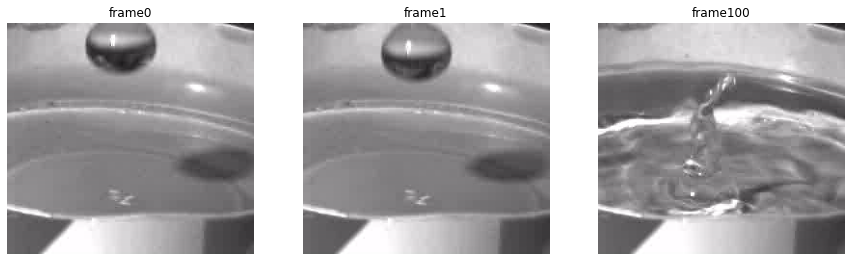

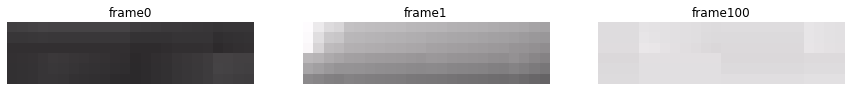

In [2]:
import cv2

capture = cv2.VideoCapture('../data/drop.avi')
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print('Frame count:', frame_count)

print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame0 = capture.read()

print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame1 = capture.read()



capture.set(cv2.CAP_PROP_POS_FRAMES, 100)
print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame100 = capture.read()



##############################################################
print_image('frame0',   'frame0',  frame0,  29,35,108,115)
print_image('frame1',   'frame1',  frame1,  29,35,108,115)
print_image('frame1000','frame100',frame100,29,35,108,115)
plt.figure(figsize=(15,15))
plt_view_image(plt,[["frame0",frame0], ["frame1",frame1], ["frame100",frame100 ],  ])
plt_view_image(plt,[["frame0",    frame0[29:35,108:132]], 
                    ["frame1",    frame1[29:35,108:132]], 
                    ["frame100",frame100[29:35,108:132]]
                   ])
cv2.imshow('frame0, frame1, frame100', np.hstack([frame0, frame1,frame100,]))
cv2.waitKey()
cv2.destroyAllWindows()